# Data Wrangling with WeRateDogs

This reports details the wrangling of data derived from tweet from the WeRateDogs account as well as an exploration of that data. The data wrangling includes the wrangling of an archive of WeRateDogs tweet data, data obtained from an image prediction tool, as well as data obtained from the Twitter API. With this wrangled data, I explore the popularity and ratings of different dog breeds, and also explore a potential correlation between popularity and ratings. 

## Gathering the Data

In this section, I will cover the data gathering process of three data sources: 

1. WeRateDogs twitter archive (flat-file)
2. WeRateDogs image predictions (hosted flat-file)
3. WeRateDogs Twitter API data

###  1. Twitter Archive

Gathering the data for the provided flat-file just involves using Pandas to read the csv file into a dataframe.

In [1]:
import pandas as pd

In [2]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### 2. Image Predictions

The image prediction data is stored in a hosted tsv file. I will import the requests library in order to request and retrieve this file, and then read the tsv file into a dataframe.

In [3]:
import requests

In [4]:
predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predict_url)
with open('image_predictions.tsv', 'wb') as file:
          file.write(response.content)

In [5]:
df_predict = pd.read_csv("image_predictions.tsv", sep = '\t')
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3.  API data

I will access the Twitter API with Tweepy to obtain retweet and likes data. 

To begin, I'll import Tweepy, input credentials, and set Tweepy to wait on Twitter's API rate limit. 

In [174]:
import tweepy

consumer_key = 'removed'
consumer_secret = 'removed'
access_token = 'removed'
access_secret = 'removed'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [175]:
auth.consumer_key # confirming that key and tokens are removed 

b'removed'

Next, I'll send an API call for each tweet ID in the twitter archive, and write the successful API response contents to a text file later to be parsed. I will print out a success or failure message for each call, so that I may (1) track the progress of the API calls, and (2) ensure that failed API responses are due to deleted tweets and not network connection errors. 

In [7]:
import json

problem_tweets = [] #initializing dictionary to hold problem tweet ids and respective error messages

with open('tweet_json.txt','w') as json_text_file:
    for id_tweet in df_archive.tweet_id:
        try: 
            json.dump(api.get_status(id_tweet, tweet_mode='extended')._json,json_text_file) # get JSON object from Status object and dump to text file
            json_text_file.write('\n') # line break so following json text is on new line
            print("Tweet {} retreived and written".format(id_tweet)) # printing successes to indicate progress
        except Exception as e:
            problem_tweets.append(dict(id = id_tweet, exception = e))
            print("There is a problem with tweet {}".format(id_tweet))
            print(e)

Tweet 892420643555336193 retreived and written
Tweet 892177421306343426 retreived and written
Tweet 891815181378084864 retreived and written
Tweet 891689557279858688 retreived and written
Tweet 891327558926688256 retreived and written
Tweet 891087950875897856 retreived and written
Tweet 890971913173991426 retreived and written
Tweet 890729181411237888 retreived and written
Tweet 890609185150312448 retreived and written
Tweet 890240255349198849 retreived and written
Tweet 890006608113172480 retreived and written
Tweet 889880896479866881 retreived and written
Tweet 889665388333682689 retreived and written
Tweet 889638837579907072 retreived and written
Tweet 889531135344209921 retreived and written
Tweet 889278841981685760 retreived and written
Tweet 888917238123831296 retreived and written
Tweet 888804989199671297 retreived and written
Tweet 888554962724278272 retreived and written
There is a problem with tweet 888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}

Tweet 859924526012018688 retreived and written
Tweet 859851578198683649 retreived and written
Tweet 859607811541651456 retreived and written
Tweet 859196978902773760 retreived and written
Tweet 859074603037188101 retreived and written
Tweet 858860390427611136 retreived and written
Tweet 858843525470990336 retreived and written
Tweet 858471635011153920 retreived and written
Tweet 858107933456039936 retreived and written
Tweet 857989990357356544 retreived and written
Tweet 857746408056729600 retreived and written
Tweet 857393404942143489 retreived and written
Tweet 857263160327368704 retreived and written
Tweet 857214891891077121 retreived and written
Tweet 857062103051644929 retreived and written
Tweet 857029823797047296 retreived and written
Tweet 856602993587888130 retreived and written
Tweet 856543823941562368 retreived and written
Tweet 856526610513747968 retreived and written
Tweet 856330835276025856 retreived and written
Tweet 856288084350160898 retreived and written
Tweet 8562820

Tweet 832397543355072512 retreived and written
Tweet 832369877331693569 retreived and written
Tweet 832273440279240704 retreived and written
Tweet 832215909146226688 retreived and written
Tweet 832215726631055365 retreived and written
Tweet 832088576586297345 retreived and written
Tweet 832040443403784192 retreived and written
Tweet 832032802820481025 retreived and written
Tweet 831939777352105988 retreived and written
Tweet 831926988323639298 retreived and written
Tweet 831911600680497154 retreived and written
Tweet 831670449226514432 retreived and written
Tweet 831650051525054464 retreived and written
Tweet 831552930092285952 retreived and written
Tweet 831322785565769729 retreived and written
Tweet 831315979191906304 retreived and written
Tweet 831309418084069378 retreived and written
Tweet 831262627380748289 retreived and written
Tweet 830956169170665475 retreived and written
Tweet 830583320585068544 retreived and written
Tweet 830173239259324417 retreived and written
Tweet 8300974

Tweet 812466873996607488 retreived and written
Tweet 812372279581671427 retreived and written
Tweet 811985624773361665 retreived and written
Tweet 811744202451197953 retreived and written
Tweet 811647686436880384 retreived and written
Tweet 811627233043480576 retreived and written
Tweet 811386762094317568 retreived and written
Tweet 810984652412424192 retreived and written
Tweet 810896069567610880 retreived and written
Tweet 810657578271330305 retreived and written
Tweet 810284430598270976 retreived and written
Tweet 810254108431155201 retreived and written
Tweet 809920764300447744 retreived and written
Tweet 809808892968534016 retreived and written
Tweet 809448704142938112 retreived and written
Tweet 809220051211603969 retreived and written
Tweet 809084759137812480 retreived and written
Tweet 808838249661788160 retreived and written
Tweet 808733504066486276 retreived and written
Tweet 808501579447930884 retreived and written
Tweet 808344865868283904 retreived and written
Tweet 8081346

Tweet 788552643979468800 retreived and written
Tweet 788412144018661376 retreived and written
Tweet 788178268662984705 retreived and written
Tweet 788150585577050112 retreived and written
Tweet 788070120937619456 retreived and written
Tweet 788039637453406209 retreived and written
Tweet 787810552592695296 retreived and written
Tweet 787717603741622272 retreived and written
Tweet 787397959788929025 retreived and written
Tweet 787322443945877504 retreived and written
Tweet 787111942498508800 retreived and written
Tweet 786963064373534720 retreived and written
Tweet 786729988674449408 retreived and written
Tweet 786709082849828864 retreived and written
Tweet 786664955043049472 retreived and written
Tweet 786595970293370880 retreived and written
Tweet 786363235746385920 retreived and written
Tweet 786286427768250368 retreived and written
Tweet 786233965241827333 retreived and written
Tweet 786051337297522688 retreived and written
Tweet 786036967502913536 retreived and written
Tweet 7859278

Tweet 765222098633691136 retreived and written
Tweet 764857477905154048 retreived and written
Tweet 764259802650378240 retreived and written
Tweet 763956972077010945 retreived and written
Tweet 763837565564780549 retreived and written
Tweet 763183847194451968 retreived and written
Tweet 763167063695355904 retreived and written
Tweet 763103485927849985 retreived and written
Tweet 762699858130116608 retreived and written
Tweet 762471784394268675 retreived and written
Tweet 762464539388485633 retreived and written
Tweet 762316489655476224 retreived and written
Tweet 762035686371364864 retreived and written
Tweet 761976711479193600 retreived and written
Tweet 761750502866649088 retreived and written
Tweet 761745352076779520 retreived and written
Tweet 761672994376806400 retreived and written
Tweet 761599872357261312 retreived and written
Tweet 761371037149827077 retreived and written
Tweet 761334018830917632 retreived and written
Tweet 761292947749015552 retreived and written
Tweet 7612273

Rate limit reached. Sleeping for: 654


Tweet 758740312047005698 retreived and written
Tweet 758474966123810816 retreived and written
Tweet 758467244762497024 retreived and written
Tweet 758405701903519748 retreived and written
Tweet 758355060040593408 retreived and written
Tweet 758099635764359168 retreived and written
Tweet 758041019896193024 retreived and written
Tweet 757741869644341248 retreived and written
Tweet 757729163776290825 retreived and written
Tweet 757725642876129280 retreived and written
Tweet 757611664640446465 retreived and written
Tweet 757597904299253760 retreived and written
Tweet 757596066325864448 retreived and written
Tweet 757400162377592832 retreived and written
Tweet 757393109802180609 retreived and written
Tweet 757354760399941633 retreived and written
Tweet 756998049151549440 retreived and written
Tweet 756939218950160384 retreived and written
Tweet 756651752796094464 retreived and written
Tweet 756526248105566208 retreived and written
Tweet 756303284449767430 retreived and written
Tweet 7562885

Tweet 739932936087216128 retreived and written
Tweet 739844404073074688 retreived and written
Tweet 739623569819336705 retreived and written
Tweet 739606147276148736 retreived and written
Tweet 739544079319588864 retreived and written
Tweet 739485634323156992 retreived and written
Tweet 739238157791694849 retreived and written
Tweet 738891149612572673 retreived and written
Tweet 738885046782832640 retreived and written
Tweet 738883359779196928 retreived and written
Tweet 738537504001953792 retreived and written
Tweet 738402415918125056 retreived and written
Tweet 738184450748633089 retreived and written
Tweet 738166403467907072 retreived and written
Tweet 738156290900254721 retreived and written
Tweet 737826014890496000 retreived and written
Tweet 737800304142471168 retreived and written
Tweet 737678689543020544 retreived and written
Tweet 737445876994609152 retreived and written
Tweet 737322739594330112 retreived and written
Tweet 737310737551491075 retreived and written
Tweet 7367361

Tweet 711363825979756544 retreived and written
Tweet 711306686208872448 retreived and written
Tweet 711008018775851008 retreived and written
Tweet 710997087345876993 retreived and written
Tweet 710844581445812225 retreived and written
Tweet 710833117892898816 retreived and written
Tweet 710658690886586372 retreived and written
Tweet 710609963652087808 retreived and written
Tweet 710588934686908417 retreived and written
Tweet 710296729921429505 retreived and written
Tweet 710283270106132480 retreived and written
Tweet 710272297844797440 retreived and written
Tweet 710269109699739648 retreived and written
Tweet 710153181850935296 retreived and written
Tweet 710140971284037632 retreived and written
Tweet 710117014656950272 retreived and written
Tweet 709918798883774466 retreived and written
Tweet 709901256215666688 retreived and written
Tweet 709852847387627521 retreived and written
Tweet 709566166965075968 retreived and written
Tweet 709556954897764353 retreived and written
Tweet 7095192

Tweet 697995514407682048 retreived and written
Tweet 697990423684476929 retreived and written
Tweet 697943111201378304 retreived and written
Tweet 697881462549430272 retreived and written
Tweet 697630435728322560 retreived and written
Tweet 697616773278015490 retreived and written
Tweet 697596423848730625 retreived and written
Tweet 697575480820686848 retreived and written
Tweet 697516214579523584 retreived and written
Tweet 697482927769255936 retreived and written
Tweet 697463031882764288 retreived and written
Tweet 697270446429966336 retreived and written
Tweet 697259378236399616 retreived and written
Tweet 697255105972801536 retreived and written
Tweet 697242256848379904 retreived and written
Tweet 696900204696625153 retreived and written
Tweet 696894894812565505 retreived and written
Tweet 696886256886657024 retreived and written
Tweet 696877980375769088 retreived and written
Tweet 696754882863349760 retreived and written
Tweet 696744641916489729 retreived and written
Tweet 6967138

Tweet 686035780142297088 retreived and written
Tweet 686034024800862208 retreived and written
Tweet 686007916130873345 retreived and written
Tweet 686003207160610816 retreived and written
Tweet 685973236358713344 retreived and written
Tweet 685943807276412928 retreived and written
Tweet 685906723014619143 retreived and written
Tweet 685681090388975616 retreived and written
Tweet 685667379192414208 retreived and written
Tweet 685663452032069632 retreived and written
Tweet 685641971164143616 retreived and written
Tweet 685547936038666240 retreived and written
Tweet 685532292383666176 retreived and written
Tweet 685325112850124800 retreived and written
Tweet 685321586178670592 retreived and written
Tweet 685315239903100929 retreived and written
Tweet 685307451701334016 retreived and written
Tweet 685268753634967552 retreived and written
Tweet 685198997565345792 retreived and written
Tweet 685169283572338688 retreived and written
Tweet 684969860808454144 retreived and written
Tweet 6849597

Tweet 678334497360859136 retreived and written
Tweet 678278586130948096 retreived and written
Tweet 678255464182861824 retreived and written
Tweet 678023323247357953 retreived and written
Tweet 678021115718029313 retreived and written
Tweet 677961670166224897 retreived and written
Tweet 677918531514703872 retreived and written
Tweet 677895101218201600 retreived and written
Tweet 677716515794329600 retreived and written
Tweet 677700003327029250 retreived and written
Tweet 677698403548192770 retreived and written
Tweet 677687604918272002 retreived and written
Tweet 677673981332312066 retreived and written
Tweet 677662372920729601 retreived and written
Tweet 677644091929329666 retreived and written
Tweet 677573743309385728 retreived and written
Tweet 677565715327688705 retreived and written
Tweet 677557565589463040 retreived and written
Tweet 677547928504967168 retreived and written
Tweet 677530072887205888 retreived and written
Tweet 677335745548390400 retreived and written
Tweet 6773346

Rate limit reached. Sleeping for: 638


Tweet 676975532580409345 retreived and written
Tweet 676957860086095872 retreived and written
Tweet 676949632774234114 retreived and written
Tweet 676948236477857792 retreived and written
Tweet 676946864479084545 retreived and written
Tweet 676942428000112642 retreived and written
Tweet 676936541936185344 retreived and written
Tweet 676916996760600576 retreived and written
Tweet 676897532954456065 retreived and written
Tweet 676864501615042560 retreived and written
Tweet 676821958043033607 retreived and written
Tweet 676819651066732545 retreived and written
Tweet 676811746707918848 retreived and written
Tweet 676776431406465024 retreived and written
Tweet 676617503762681856 retreived and written
Tweet 676613908052996102 retreived and written
Tweet 676606785097199616 retreived and written
Tweet 676603393314578432 retreived and written
Tweet 676593408224403456 retreived and written
Tweet 676590572941893632 retreived and written
Tweet 676588346097852417 retreived and written
Tweet 6765829

Tweet 672997845381865473 retreived and written
Tweet 672995267319328768 retreived and written
Tweet 672988786805112832 retreived and written
Tweet 672984142909456390 retreived and written
Tweet 672980819271634944 retreived and written
Tweet 672975131468300288 retreived and written
Tweet 672970152493887488 retreived and written
Tweet 672968025906282496 retreived and written
Tweet 672964561327235073 retreived and written
Tweet 672902681409806336 retreived and written
Tweet 672898206762672129 retreived and written
Tweet 672884426393653248 retreived and written
Tweet 672877615439593473 retreived and written
Tweet 672834301050937345 retreived and written
Tweet 672828477930868736 retreived and written
Tweet 672640509974827008 retreived and written
Tweet 672622327801233409 retreived and written
Tweet 672614745925664768 retreived and written
Tweet 672609152938721280 retreived and written
Tweet 672604026190569472 retreived and written
Tweet 672594978741354496 retreived and written
Tweet 6725917

Tweet 669683899023405056 retreived and written
Tweet 669682095984410625 retreived and written
Tweet 669680153564442624 retreived and written
Tweet 669661792646373376 retreived and written
Tweet 669625907762618368 retreived and written
Tweet 669603084620980224 retreived and written
Tweet 669597912108789760 retreived and written
Tweet 669583744538451968 retreived and written
Tweet 669573570759163904 retreived and written
Tweet 669571471778410496 retreived and written
Tweet 669567591774625800 retreived and written
Tweet 669564461267722241 retreived and written
Tweet 669393256313184256 retreived and written
Tweet 669375718304980992 retreived and written
Tweet 669371483794317312 retreived and written
Tweet 669367896104181761 retreived and written
Tweet 669363888236994561 retreived and written
Tweet 669359674819481600 retreived and written
Tweet 669354382627049472 retreived and written
Tweet 669353438988365824 retreived and written
Tweet 669351434509529089 retreived and written
Tweet 6693285

Tweet 666418789513326592 retreived and written
Tweet 666411507551481857 retreived and written
Tweet 666407126856765440 retreived and written
Tweet 666396247373291520 retreived and written
Tweet 666373753744588802 retreived and written
Tweet 666362758909284353 retreived and written
Tweet 666353288456101888 retreived and written
Tweet 666345417576210432 retreived and written
Tweet 666337882303524864 retreived and written
Tweet 666293911632134144 retreived and written
Tweet 666287406224695296 retreived and written
Tweet 666273097616637952 retreived and written
Tweet 666268910803644416 retreived and written
Tweet 666104133288665088 retreived and written
Tweet 666102155909144576 retreived and written
Tweet 666099513787052032 retreived and written
Tweet 666094000022159362 retreived and written
Tweet 666082916733198337 retreived and written
Tweet 666073100786774016 retreived and written
Tweet 666071193221509120 retreived and written
Tweet 666063827256086533 retreived and written
Tweet 6660586

In [8]:
df_api_problem_tweets = pd.DataFrame.from_dict(problem_tweets)
df_api_problem_tweets = df_api_problem_tweets[['id','exception']]
df_api_problem_tweets

,id,exception
0,888202515573088257,"[{'code': 144, 'message': 'No status found wit..."
1,873697596434513921,"[{'code': 144, 'message': 'No status found wit..."
2,872668790621863937,"[{'code': 144, 'message': 'No status found wit..."
3,872261713294495745,"[{'code': 144, 'message': 'No status found wit..."
4,869988702071779329,"[{'code': 144, 'message': 'No status found wit..."
5,866816280283807744,"[{'code': 144, 'message': 'No status found wit..."
6,861769973181624320,"[{'code': 144, 'message': 'No status found wit..."
7,845459076796616705,"[{'code': 144, 'message': 'No status found wit..."
8,842892208864923648,"[{'code': 144, 'message': 'No status found wit..."
9,837012587749474308,"[{'code': 144, 'message': 'No status found wit..."


It does appear that the only errors are due to missing IDs, which can happen with tweets that have been deleted. So I do think I got all the tweet data available.

I will now parse the JSON lines in the newly created text file for the retweet and likes ("favorites"), and write the data to a dataframe. 

In [75]:
tweet_attributes = ['id', 'retweet_count', 'favorite_count']
tweet_dict = []

with open('tweet_json.txt', 'r') as json_text_file: 
    json_string_list = json_text_file.readlines()

for json_string in json_string_list:
    json_full_dict = json.loads(json_string)
    tweet_dict.append(dict((attribute,json_full_dict[attribute]) for attribute in tweet_attributes))

df_api = pd.DataFrame.from_dict(tweet_dict)
column_order = ['id', 'retweet_count', 'favorite_count']
df_api = df_api[column_order]
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8220,37733
1,892177421306343426,6077,32400
2,891815181378084864,4021,24397
3,891689557279858688,8375,41040
4,891327558926688256,9080,39231
5,891087950875897856,3011,19721
6,890971913173991426,1989,11533
7,890729181411237888,18272,63634
8,890609185150312448,4137,27114
9,890240255349198849,7140,31100


It does appear the API data has successfully been written to a dataframe.

## Assessing the Data

I will now assess the gathered data for dirtiness and tidiness issues. Most of the assessment concerns the archive, as the image predictions and API dataframe do appear to be relatively clean and tidy.

###  1. Twitter Archive

To begin, I will preview the dataframe and run `info()` on the table and review the shape of the table and its columns.

In [76]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [77]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

I have the following thoughts just from previewing the table and reviewing the column info:

* column names are generally self-descriptive
* there are multiple columns concerning replies and retweets; I don't think these are necessary
* there are multiple columns containing less than 2356 values, potentially indicating missing data 


Now, I'll basically assess each column from left to right.

#### tweet_id
With **tweet_id**, I want to check that the id's are unique. 

In [78]:
df_archive.tweet_id.nunique()

2356

The IDs are unique, yet they are currently formatted as integers. Perhaps they should formatted as strings, as IDs usually are not manipulated nor subject to mathematical exploration. 

#### in_reply_to_status_id, in_reply_to_user_id 

As mentioned before, I don't think the reply columns will be necessary, as this project concerns wrangling and exploring original ratings. Therefore in the cleaning stage of the wrangling, I think I will use the reply and retweet columns to filter out the replies and retweets, and then remove these columns from the table. 

#### timestamp

For the **timestamp** column, *if* I were to use this column for the exploration, I would like to make sure that this column is formatted as a datetime column, rather than strings. 

I will check the object type of the values in this column. 

In [79]:
type(df_archive.timestamp[0])

str

The timestamps are currently formatted as strings, so I will need to consider addressing the type in the cleaning stage of the analysis. 

#### source

Next, I will review the **source** column.

In [80]:
df_archive.source.value_counts(0)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

It appears the **source** columns indicates whether the tweet was posted using the iPhone Twitter application, TweetDeck, the Twitter web client, or Vine. Given that Vines are short videos, perhaps there won't be image predictions for these tweets, but these tweets do appear to have valid ratings, so I don't see any issues concerning cleanliness or tidiness.

#### text


I will check the **text** columns for uniqueness. 

In [81]:
df_archive.text.nunique()

2356

The **text** column does indeed have unique values. From previewing the entire table, and from reviewing the text contents from reviewing the Vine tweets, I do not see any problems with cleaniness or tidiness.

#### retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

Like with the reply columns, I do think that the retweets columns will be irrelevant after removing retweets from the table.

#### expanded_urls

I will assess the **expanded_urls** column. This column does have some empty rows, so I will review these empty rows to see if there appear to be cleanliness issues overall with the rows. 

In [82]:
df_archive.expanded_urls.nunique()

2218

I wiill check the tweets missing URLs.

In [83]:
df_archive[df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


It seems that most of these are replies or retweets. I will check if there are any original tweets missing urls. 

In [84]:
df_archive[df_archive.in_reply_to_status_id.isnull() 
           & df_archive.retweeted_status_id.isnull() 
           & df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [85]:
for i in df_archive[df_archive.in_reply_to_status_id.isnull() 
           & df_archive.retweeted_status_id.isnull() 
           & df_archive.expanded_urls.isnull()].text:
    print(i)

Beebop and Doobert should start a band 12/10 would listen
Today, 10/10, should be National Dog Rates Day
Oh my god 10/10 for every little hot dog pupper


So there are three original tweets with missing URLs. The tweets and ratings seem valid, and I don't think the URL is an essential piece of data for the tweets. So at the moment, I'm not convinced that these rows should be dropped. 

Not only are some urls missing, but some are duplicates. I will inspect the duplicates.

In [86]:
df_archive[df_archive.expanded_urls.notnull() & df_archive.expanded_urls.duplicated(False)].sort_values(by = ['expanded_urls'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None


It appears the duplicated urls are from retweets, which will probably be removed later on. 

#### rating_numerator, rating_denominator

Next, I will review the ratings fields. Given both are float columns, I will compute descriptive statistics to inspect for dirty data. 

In [87]:
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The zero minimums for the numerators and denominators are concerning. I will filter for zero values and review.

In [88]:
df_archive[(df_archive.rating_numerator == 0) | (df_archive.rating_denominator == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [89]:
for i in df_archive[(df_archive.rating_numerator == 0) | (df_archive.rating_denominator == 0)].text:
    print(i)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


Three tweets are returned, and the first and third tweets are replies, which will be removed. The second tweet is not a typical rating, but WeRateDogs accusing another Twitter account of plagiarism, and awarding the plagiarizing tweet a rating of "0/10". If the scope of this project strictly concerns dog ratings, perhaps this can be considered an invalid row and should be dropped.

While a zero value is a red flag, I will inspect additional ratings less than a 10/10, given WeRateDogs usually rates above 10/10. 

In [90]:
df_archive[(df_archive.rating_numerator < 10) | (df_archive.rating_numerator < 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


More rows were outputted here than I expected. I will check a few of the tweets.

In [91]:
checking_numerators = df_archive[df_archive.rating_numerator < 10].index
# printing to get entire string output
for tweet in checking_numerators:
    print(df_archive.text[tweet])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. 

In [92]:
checking_denominators = df_archive[df_archive.rating_denominator < 10].index
# printing to get entire string output
for tweet in checking_denominators:
    print('{} '.format(tweet) + df_archive.text[tweet])

313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
2335 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


After perusing the tweets, I do see that there is a tweet with an actual rating of "13.5/10" while the rating in the set is "5/10". I'm guessing whatever algorithm was used to extract the rating didn't account for decimals. 

For denominators, there are only two tweets with ratings less than 10, and both of them are invalid. The first tweet included the phrase "24/7", which was mistaken for a rating. The second tweet includes "1/2" to denote half of a leg, which was mistaken for a rating. 

The ratings should probably be re-extracted accounting for float values and phrases that are not actual ratings

Now that the minimum values have been inspected and addressed. I will inspect the maximum values.

In [93]:
df_archive.sort_values(by = ['rating_numerator'], ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [94]:
df_archive.sort_values(by = ['rating_denominator'], ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


I am suspect of any rating numerator greater than 14 or any denominator greater than 10. I will filter based on these conditions and inspect these tweets.

In [95]:
df_archive[(df_archive.rating_numerator > 14) | (df_archive.rating_denominator > 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [96]:
suspect_ratings = df_archive[(df_archive.rating_numerator > 14) | (df_archive.rating_denominator > 10)].index
for tweet in suspect_ratings:
    print('{} '.format(tweet) + df_archive.text[tweet])

55 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
188 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
285 RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
290 @markhoppus 182/10
291 @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340 RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
342 @docmisterio account started on 11/15/15
433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling

After reviewing, it does seem that many of the denominators not equal to 10 are due to the denominator being multipled by the number of dogs in the tweet. Then there are joke ratings of 1776 and 420. Otherwise, there appear to be invalid ratings due to the previously mentioned extraction issues.

Generally, there are cleanliness issues with the data as there are inaccurate ratings with the ratings being extracted incorrectly. 

#### name

I will now assess the name values, checking that the values are valid names.

In [97]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Buddy         7
Bailey        7
an            7
Toby          7
Scout         6
Leo           6
Milo          6
Dave          6
Rusty         6
Oscar         6
Koda          6
Bella         6
Jack          6
Jax           6
Stanley       6
Finn          5
           ... 
Einstein      1
Dewey         1
Tito          1
Miguel        1
Rodman        1
Dylan         1
Adele         1
Tilly         1
Corey         1
Ricky         1
Lulu          1
Kollin        1
Vinnie        1
Rodney        1
Kuyu          1
Bloop         1
all           1
Kellogg       1
Jimbo         1
Blipson       1
Crawford      1
Kingsley      1
Shooter       1
Craig         1
Dug           1
Mac           1
Divine        1
Huck          1
Monster       1
Horace        1
Name: name, Length: 957,

By simply running the value_counts() function, I can spot some invalid values, such as "a", "the, and "an". As all the capitalized values do appears to be valid, I will filter and inspect uncapitalized values.  

In [98]:
df_archive[df_archive.name.str.islower()].name.values

array(['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly',
       'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not',
       'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just',
       'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a',
       'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very',
       'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a',
       'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a',
       'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an',
       'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a'],
      dtype=object)

In [99]:
df_archive[(df_archive.name.str.islower()) & (df_archive.name != "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [100]:
for i in df_archive[(df_archive.name.str.islower()) & (df_archive.name != "None")].text.index:
    print(i, df_archive.text[i])

22 I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118 RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193 Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335 There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
369 Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
542 We only rate dogs. P

Looks like the algorithm is to just get the first word after the first "is" in the text. 

The names should probably be re-extracted.

#### doggo, floofer, pupper, puppo

I will now assess the **doggo**, **floofer**, **pupper**, and **puppo** columns. I will assess them together, as from the table preview earlier, it appears that each of these columns should be binary. Additionally, regarding the tidiness of the columns, perhaps these columns should be collapsed into a single "dog term of endearment" column. 

In [101]:
df_archive.loc[:,'doggo':].nunique()

doggo      2
floofer    2
pupper     2
puppo      2
dtype: int64

So, the columns are binary (e.g. either "None" or "doggo"). Given that they're binary, perhaps they should be converted to dummy variables (e.g. "0" or "1") so they are ready for exploration. 

Given, that they "seem" to be all values of a categorical variable, I will check if these terms appear to be mutually exclusive. If they do appear to be mutually exclusive, then I would consider collapsing the columns. 

In [102]:
df_archive[sum([df_archive.doggo != "None", 
                df_archive.floofer != "None", 
                df_archive.pupper != "None", 
                df_archive.puppo != "None"]) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


So, there are few rows with multiple terms, but not too many. It seems for the most part, that they are values for the same variable (dog stage has been suggested). These columns should perhaps be melted. 

#### Recap

To recap, here is a column-by-column summary of my assessment: 

* **tweet_id**: is integer instead of string
* **in_reply_to_status_id**, **in_reply_to_user_id**: cleanliness and tidiness issue; replies are not valid ratings thus invalid rows and columns
* **timestamp**: is string instead of datetime
* **source**: good
* **text**: good
* **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**: cleanliness and tidiness issue; retweets are not valid ratings thus invalid rows and columns
* **rating_numerator**, **rating_denominator**: inaccurate ratings
* **name**: inaccurate names
* **doggo**, **floofer**, **pupper**, **puppo**: tidiness issue; should be melted

### 2. Image Predictions

Assess the image predictions dataframe.

In [103]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [104]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [105]:
df_predict.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

#### tweet_id

The **tweet_id** has all unique values, yet, like with the archive DataFrame, is currently an integer column, and should probably be a string column

#### jpg_url

It appears that are many duplicate values for **jpg_url**. I will inspect the duplicates

In [106]:
df_predict[df_predict.jpg_url.duplicated(False)].sort_values(by = ["jpg_url"])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


It does appear that there are duplicates in the tables, where only the IDs are unique. These will probably need to be dropped. 

#### All other columns

It appears with the **p1_dog**, **p2_dog**, and **p3_dog** columns, that there might be some non-dog rows in the file. I will filter any "False" values in these columns.

In [107]:
df_predict[sum([df_predict.p1_dog, df_predict.p2_dog, df_predict.p3_dog]) < 3]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False


The first row returned (index 6) is definitely a turtle or tortoise, and returned a false value in all three columns. The third row returned (index 8), returned false in the first two columns, but true in the third; checking the URL does indeed show a dog. 

I will now filter for all three columns returning false to see if indeed there are not dogs in these pictures. 

In [108]:
df_predict[sum([df_predict.p1_dog, df_predict.p2_dog, df_predict.p3_dog]) == 0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


After inspecting a handful of these values, it does appear that these are mostly non-dog photos. I will check if predicitions only returning one true shows dog photos.

In [109]:
df_predict[sum([df_predict.p1_dog, df_predict.p2_dog, df_predict.p3_dog]) == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,7.958960e-03,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,6.207120e-02,False
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,3.676340e-02,False
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,4.842470e-02,False
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,5.729980e-03,False
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,9.248170e-02,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,8.812240e-02,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,1.609830e-01,False
119,668171859951755264,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,Chihuahua,0.664834,True,cowboy_boot,0.060343,False,giant_panda,5.983750e-02,False
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,9.442940e-02,True


It seems that these rows are more hit-and-miss with actually containing dogs. Perhaps using **p1_dog** to filter out non-dog rows would be best.

#### Recap 

To recap the assessment: 

* **tweet_id**: formatted as integer instead of string
* **jpg_url**: duplicate values
* all other columns: non-dog pictures calssifited, these should be filtered out

### Twitter API Dataframe

Assess the API-derived dataframe.

In [110]:
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8220,37733
1,892177421306343426,6077,32400
2,891815181378084864,4021,24397
3,891689557279858688,8375,41040
4,891327558926688256,9080,39231
5,891087950875897856,3011,19721
6,890971913173991426,1989,11533
7,890729181411237888,18272,63634
8,890609185150312448,4137,27114
9,890240255349198849,7140,31100


In [111]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id                2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [112]:
df_api.describe()

,id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,2898.895254,7887.594699
std,6.828729e+16,4888.332015,12223.646271
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,582.500000,1366.500000
50%,7.186133e+17,1353.000000,3431.000000
75%,7.986907e+17,3379.000000,9656.000000
max,8.924206e+17,82859.000000,162824.000000


In [113]:
df_api.nunique()

id                2339
retweet_count     1711
favorite_count    2006
dtype: int64

#### id 

The IDs are unique, but like with other tables, they are integers instead of strings. Additionally, the column should probably be renamed to "tweet_id" for consistency among the tables.

#### retweet_count, favorite_count

The descriptive statistics reveal 0 minimums for likes and retweets, which may not be unusual for my tweets, but seems odd for WeRateDogs. I will inspect these tweets. 

In [114]:
df_api[(df_api.retweet_count == 0) | (df_api.favorite_count == 0)]

,id,retweet_count,favorite_count
31,886054160059072513,104,0
35,885311592912609280,17975,0
67,879130579576475649,6622,0
72,878404777348136964,1250,0
73,878316110768087041,6467,0
77,877611172832227328,78,0
90,874434818259525634,14359,0
95,873337748698140672,1549,0
105,871166179821445120,5597,0
119,868639477480148993,2070,0


In [115]:
df_api[df_api.retweet_count == 0]

,id,retweet_count,favorite_count
282,838085839343206401,0,147


From checking tweet_json.txt file in a text editor, these 0 counts for favorites are retweets. This makes sense, since the IDs were pulled from the twitter archive. I checked the tweet with 0 retweets, and it was a reply (https://twitter.com/dog_rates/status/838085839343206401). This will be addressed in cleaning when replies and retweets are dropped and API data is joined. 

#### Recap

To quickly recap: 

* **id**: currently integer instead of string; should rename to "tweet_id" for consistency
* **retweet_count**, **favorite_count**: some invalid rows with replies and retweets 

## Cleaning the Data

I will now address all the issues identified in the assessment, beginning with the archive DataFrame.

### Cleaning the Archive DataFrame

Cleaning the archive DataFrame will involve the removal of retweets and replies, conversion to correct types, the re-extraction of ratings and names, and the melting of columns. Similarly to the assessment, I will address the columns in order from left to right. 

In [116]:
df_archive_clean = df_archive.copy()

#### tweet_id

##### Define

Convert **tweet_id** from integer to string.

##### Code

In [117]:
df_archive_clean['tweet_id'] = df_archive_clean.tweet_id.apply(str)

###### Test

In [118]:
type(df_archive_clean.tweet_id[0])

str

The column was successfully converted

#### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status

##### Define

Use columns to filter for and drop rows. Then drop the columns.

##### Code

In [119]:
# filtering the archive for rows that either have the reply status id or retweet id populated
df_archive_clean[df_archive_clean[['in_reply_to_status_id', 'retweeted_status_id']].notnull().any(axis=1) == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None


In [120]:
# dropping the retweets and replies
retweets_replies = df_archive_clean[df_archive_clean[['in_reply_to_status_id', 'retweeted_status_id']].notnull().any(axis=1) == True].index
df_archive_clean.drop(retweets_replies, inplace = True)

I will now drop all irrelevant columns, which are the reply and retweet columns.

In [121]:
archive_columns_todrop = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                          'retweeted_status_id', 'retweeted_status_user_id',
                          'retweeted_status_timestamp']
df_archive_clean.drop(columns = archive_columns_todrop, inplace = True)

##### Test

In [122]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


The shape reflects the dropped rows and columns. The test was successful.

#### timestamp

##### Define

Covert strings to datetime object.

##### Code

In [123]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

##### Test

In [124]:
type(df_archive_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

The type was converted successfully.

#### rating_numerator, rating_denominator

##### Define

Extract correct ratings from tweet texts.

##### Code

The extraction will begin with copying the tweet texts and scrubbing and letters followed directly by periods and ellipses. There are some tweets where the ratings immediately follow the end of sentence or an ellipses, thus they will be scrubbed here in order to prevent the inaccurate extraction of floats. 

After scrubbings, float values in the format of "float/float" will be extracted. 

Additionally, there is a subset of tweets with multiple ratings. Given the relatively small set of values and there not being a systematic way to account for these cases, these rows will be dropped.

In [125]:
import re

#scrubbing letter followed by period and ellipses in order to prevent extraction of inaccurate floats
scrubbed_texts = df_archive_clean.text.str.replace('([a-z]\.)|(\.\.\.)', '')
# extracting floats in "float/float" format
# float regex found here: https://docs.python.org/3/library/re.html#simulating-scanf
floats = scrubbed_texts.str.findall("[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?/[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?")

In [126]:
# saving index of multiple ratings to use drop rows from DataFrame
multiple_ratings_index = floats[floats.apply(lambda x: len(x)) > 1].index

In [127]:
floats

0                      [(13, , , 10, , )]
1                      [(13, , , 10, , )]
2                      [(12, , , 10, , )]
3                      [(13, , , 10, , )]
4                      [(12, , , 10, , )]
5                      [(13, , , 10, , )]
6                      [(13, , , 10, , )]
7                      [(13, , , 10, , )]
8                      [(13, , , 10, , )]
9                      [(14, , , 10, , )]
10                     [(13, , , 10, , )]
11                     [(13, , , 10, , )]
12                     [(13, , , 10, , )]
13                     [(12, , , 10, , )]
14                     [(13, , , 10, , )]
15                     [(13, , , 10, , )]
16                     [(12, , , 10, , )]
17                     [(13, , , 10, , )]
18                     [(13, , , 10, , )]
20                     [(12, , , 10, , )]
21                     [(13, , , 10, , )]
22                     [(14, , , 10, , )]
23                     [(13, , , 10, , )]
24                     [(13, , , 1

In [128]:
floats[4][-1][0]

'12'

In [129]:
floats.apply(lambda x: len(x)).value_counts()

1    2070
2      26
3       1
Name: text, dtype: int64

In [130]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [131]:
float_numerator = []
float_denominator = []

for i in floats.index:
    numerator = floats[i][-1][0]
    numerator = float(numerator)
    float_numerator.append(numerator)
    denominator = floats[i][-1][3]
    denominator = float(denominator)
    float_denominator.append(denominator)
    
df_archive_clean["rating_numerator"] = float_numerator
df_archive_clean["rating_denominator"] = float_denominator
df_archive_clean.drop(multiple_ratings_index, inplace = True)

##### Test

I will assess the ratings to check for any remaining problem values. To begin, I will check values less than, given this is where I can expect inaccurate values if there were problems with the extraction (e.g. extracting ".10/10" instead of "10/10"). 

In [132]:
df_archive_clean[(df_archive_clean.rating_numerator < 10)].sort_values(by = ['rating_numerator'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.00,10.0,None,None,None,None,None
2091,670783437142401025,2015-11-29 01:56:48,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,https://twitter.com/dog_rates/status/670783437...,1.00,10.0,None,None,None,None,None
1869,675153376133427200,2015-12-11 03:21:23,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,https://twitter.com/dog_rates/status/675153376...,1.00,10.0,None,None,None,None,None
2261,667549055577362432,2015-11-20 03:44:31,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1.00,10.0,None,None,None,None,None
2338,666104133288665088,2015-11-16 04:02:55,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1.00,10.0,None,None,None,None,None
2246,667878741721415682,2015-11-21 01:34:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,2.00,10.0,Tedrick,None,None,None,None
2326,666411507551481857,2015-11-17 00:24:19,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,2.00,10.0,quite,None,None,None,None
2310,666786068205871104,2015-11-18 01:12:41,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,https://twitter.com/dog_rates/status/666786068...,2.00,10.0,None,None,None,None,None
2237,668142349051129856,2015-11-21 19:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,https://twitter.com/dog_rates/status/668142349...,2.00,10.0,None,None,None,None,None
1764,678424312106393600,2015-12-20 03:58:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2.00,10.0,Crystal,None,None,None,None


In [133]:
for i in df_archive_clean[(df_archive_clean.rating_numerator < 10)].sort_values(by = ['rating_numerator']).index:
    print(i, df_archive_clean.text[i])

315 When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
2091 Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
1869 What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
2261 Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
2338 Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX
2246 This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN
2326 This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t
2310 Unfamiliar with this breed. Ear

In [134]:
df_archive_clean[(df_archive_clean.rating_denominator < 10)].sort_values(by = ['rating_denominator'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None


The only problem values I see is with the "24/7" rating returned in the denominator query. Yet, there wasn't a problem with the extraction here. There is only "float/float" string in the text. 

Given that I happened to see it, I will drop it here. 

In [135]:
df_archive_clean.drop(516, inplace = True)

In [136]:
df_archive_clean[(df_archive_clean.rating_denominator < 10)].sort_values(by = ['rating_denominator'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Otherwise, the extraction looks to have been successful. 

#### name

##### Define

Extract proper names from tweet texts. 

##### Code

I will inspect the tweets that currently have a lowercase name value for patterns.

In [137]:
for i in df_archive_clean[df_archive_clean.name.str.islower()].index:
    print(i, df_archive_clean[df_archive_clean.name.str.islower()].text[i])

22 I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
169 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193 Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335 There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
369 Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
542 We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
649 Here is a per

2211 Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho https://t.co/2Su7gmsnZm
2212 Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3
2218 This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt
2222 Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://t.co/YOHe6lf09m
2235 This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb
2249 This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba
2255 This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD
2264 Th

It appears that generally, the names are capitalized words that follow "is" or "named".

In [138]:
extracted_names = df_archive_clean.text.str.findall("\s(is|named)\s([A-Z][a-z]+)")
extracted_names

0        [(is, Phineas)]
1          [(is, Tilly)]
2         [(is, Archie)]
3          [(is, Darla)]
4       [(is, Franklin)]
5                     []
6                     []
7                     []
8           [(is, Zoey)]
9         [(is, Cassie)]
10          [(is, Koda)]
11         [(is, Bruno)]
12                    []
13           [(is, Ted)]
14        [(is, Stuart)]
15        [(is, Oliver)]
16           [(is, Jim)]
17          [(is, Zeke)]
18       [(is, Ralphus)]
20        [(is, Gerald)]
21       [(is, Jeffrey)]
22                    []
23        [(is, Canela)]
24                    []
25                    []
26          [(is, Maya)]
27        [(is, Mingus)]
28         [(is, Derek)]
29        [(is, Roscoe)]
31       [(is, Waffles)]
              ...       
2325      [(is, Walter)]
2326                  []
2327                  []
2328                  []
2329                  []
2330                  []
2331                  []
2332                  []
2333                  []


I will now check if there are any rows with multiple extracted names.

In [139]:
many_names = extracted_names[extracted_names.apply(lambda x: len(x)) > 1].index

In [140]:
for i in many_names:
    print(i, df_archive_clean.text[i])

70 This is Beau. That is Beau's balloon. He takes it everywhere. 13/10 would protect at all costs https://t.co/YDtpCjIPKN
2078 This is Amy. She is Queen Starburst. 10/10 unexplainably juicy https://t.co/Hj2HtxpcSx
2313 This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI


In the case for names, it does appear for the multiple matches found, the first match is the name, so I will select the first match as the name, rather than dropping these rows. 

In [141]:
new_names = []

for i in extracted_names.index:
    try: 
        name = extracted_names[i][0][-1]
        new_names.append(name)
    except:
        new_names.append("None")

df_archive_clean["name"] = new_names     

##### Test

I will check the values and their counts for any anomalies.

In [142]:
df_archive_clean.name.value_counts()

None         965
Lucy          10
Oliver         9
Cooper         9
Penny          8
Tucker         8
Charlie        8
Bella          6
Oscar          6
Bo             6
Lola           6
Louis          5
Bailey         5
Zoey           5
Scout          5
Koda           5
Buddy          5
Stanley        4
Daisy          4
Sadie          4
Gus            4
Leo            4
Archie         4
Clark          4
Dexter         4
Finn           4
Jeffrey        4
Dave           4
Cassie         4
Alfie          4
            ... 
Kanu           1
Dwight         1
Jay            1
Walker         1
Clarence       1
Nico           1
Emanuel        1
Mookie         1
Jebberson      1
Amber          1
Alice          1
Lance          1
Harvey         1
Fwed           1
Rascal         1
Tove           1
Timofy         1
Brad           1
Ken            1
Mattie         1
Bradley        1
Dobby          1
Kobe           1
Amy            1
Jarod          1
Maude          1
Dale           1
Schnozz       

In [143]:
df_archive_clean[df_archive_clean.name.str.islower() == True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


All values do appear to be names. The extraction was successful.

#### doggo, floofer, pupper, puppo

##### Define

Melt the four columns.

##### Code

In [144]:
# converting dog stage columns to binary integer to prep for loop (next code block) to store dog stages in categorical variable
dog_stage_columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean[dog_stage_columns] = df_archive_clean[dog_stage_columns].replace({"None" : 0,\
                                                                                   "doggo" : 1,\
                                                                                   "floofer" : 1,\
                                                                                   "pupper" : 1,\
                                                                                   "puppo" : 1})

In [145]:
# creating array of lists, with list for each tweet containing dog stage value(s)

stages = []

for row in df_archive_clean.index:
    stage_array = []
    for column in dog_stage_columns:
        if df_archive_clean.loc[row,column] == 1:
            stage_array.append(column)
    stages.append(stage_array)
stages        

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['doggo'],
 [],
 [],
 ['puppo'],
 [],
 ['puppo'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['pupper'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['doggo'],
 [],
 [],
 ['floofer'],
 [],
 [],
 ['pupper'],
 [],
 [],
 [],
 [],
 [],
 ['pupper'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['puppo'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['pupper'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['pupper'],
 [],
 ['puppo'],
 [],
 ['pupper'],
 ['doggo'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['pupper'],
 ['doggo'],
 ['doggo'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['doggo'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['puppo'],
 [],
 [],
 [],
 ['pupper'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['puppo'],
 [],
 [],
 ['doggo'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['doggo', 'puppo'],
 [],
 [],
 [],
 [],
 [],
 ['pupper'],
 ['dogg

In [146]:
# creating "dog_stage" categorical variable column in the DataFrame and setting equal to the "stages" array
df_archive_clean['dog_stage'] = stages

# converting column to string in order to extract dog stages separated by comma
df_archive_clean['dog_stage'] = df_archive_clean.dog_stage.apply(str)

# replacing "[]" string value (formerly the empty lists) with "None"
df_archive_clean.dog_stage.replace("[]","None", inplace = True)

# scrubbing remaining brackets and single quotes
df_archive_clean.dog_stage = df_archive_clean.dog_stage.str.replace('[\[\]\'\']', '')

In [147]:
# dropping the dummy columns 
df_archive_clean.drop(columns = dog_stage_columns, inplace = True)

##### Test

To check the code, I will preview the DataFrame to ensure only the melted column remains and check the value counts of the new categorical variable, mainly to check the values are formatted as intended. 

In [148]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


In [149]:
df_archive_clean.dog_stage.value_counts()

None              1735
pupper             219
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

The dog stages appear to have been melted as intended, and the dog stage values appear to have been melted as intended. The test was successful. 

The archive DataFrame now appears clean. I will now addess the image predictions DataFrame.

### Cleaning the Image Predictions DataFrame

Cleaning the DataFrame mainly involves addressing duplicate URLs and removing rows that probably do not have dogs in the images.

In [150]:
df_predict_clean = df_predict.copy()

#### tweet_id

##### Define

Convert from integer to string.

##### Code

In [151]:
df_predict_clean['tweet_id'] = df_predict_clean.tweet_id.apply(str)

##### Test

In [152]:
type(df_predict_clean.tweet_id[0])

str

The test was successful.

#### jpg_urls

##### Define

Remove duplicates.

##### Code

In [153]:
duplicate_rows = df_predict_clean[df_predict_clean.jpg_url.duplicated()].index
df_predict_clean.drop(duplicate_rows, inplace = True)

##### Test

I will test by checking for duplicates again.

In [154]:
df_predict_clean[df_predict_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


No duplicates are found. The test was successful.

#### p1_dog and all other columns

##### Define

Drop all false **p1_dog** values, drop all columns outside of **p1**, and rename **p1** to "breed". 

##### Code

In [155]:
# drop all non-dog rows 
not_dogs_rows = df_predict_clean[df_predict_clean.p1_dog == False].index
df_predict_clean.drop(not_dogs_rows, inplace = True)

In [156]:
# drop classifier-related columns 
predict_columnstodrop = ['img_num', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'];
df_predict_clean.drop(columns = predict_columnstodrop, inplace = True);

# rename "p1" to "breed"
df_predict_clean.rename(columns = {"p1" : "breed"}, inplace = True)

##### Test

I will preview the DataFrame to check that it looks as intended

In [157]:
df_predict_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


The DataFrame looks as intended with only the columns and rows pertinent to the exploration of dog ratings. The test was successful. 

### Cleaning the API DataFrame

This table is basically clean already. Given that the tweet ID will act the primary key amongst the tables, I will rename the **id** column now for consistency. The cleaning of replies and retweets will be done when the datasets are merged.

In [158]:
df_api_clean = df_api.copy()

#### id

##### Define

Convert to strings and rename column to "tweet_id". 

##### Code

In [159]:
df_api_clean['id'] = df_api_clean.id.apply(str)

In [160]:
df_api_clean.rename(columns = {"id" : "tweet_id"}, inplace = True)

##### Test

In [161]:
type(df_api_clean.tweet_id[0])

str

The test was successful. 

Now that each of the DataFrames have been cleaned, I will now join them to produce the master DataFrame for this project.

### Joining the DataFrames

All the DataFrames have been cleaned.  

As for tidiness, given each table serves a unique purpose, they should be kept separate if they were to be maintained after this project. For the scope of this project, where we're seeking to produce insights relating to the actual and original dog ratings, separate sets of dataframes might hinder the analysis. 

Given that both the archive and API dataframes hold variables of interest, and that the image predictions dataframe allowed the removal of non-dog ratings, an inner join of each of tables would help produce a set of valid of observations along with every potential variable of interest. 

In [162]:
df_master = df_archive_clean.merge(df_predict_clean.merge(df_api_clean, on = 'tweet_id'), on = 'tweet_id')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6077,32400
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4021,24397
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9080,39231
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,3011,19721
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,1989,11533


The master table appears ready for storing and for exploration.

## Storing and Exploring the Wrangled Data

Now that the data has been cleaned and joined into a master dataframe, I will store the master table to a csv file. 

In [163]:
df_master.to_csv("twitter_archive_master.csv")

The exploration of the dataframe will mainly involve an analysis of the different breeds and exploring correlations in the dataframe. 

### Exploring the Breeds

To begin the exploration, I would to know which breeds are the most popular. I will plot a horizontal bar chart with the sorted values of tweets amongst the breeds.

In [164]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

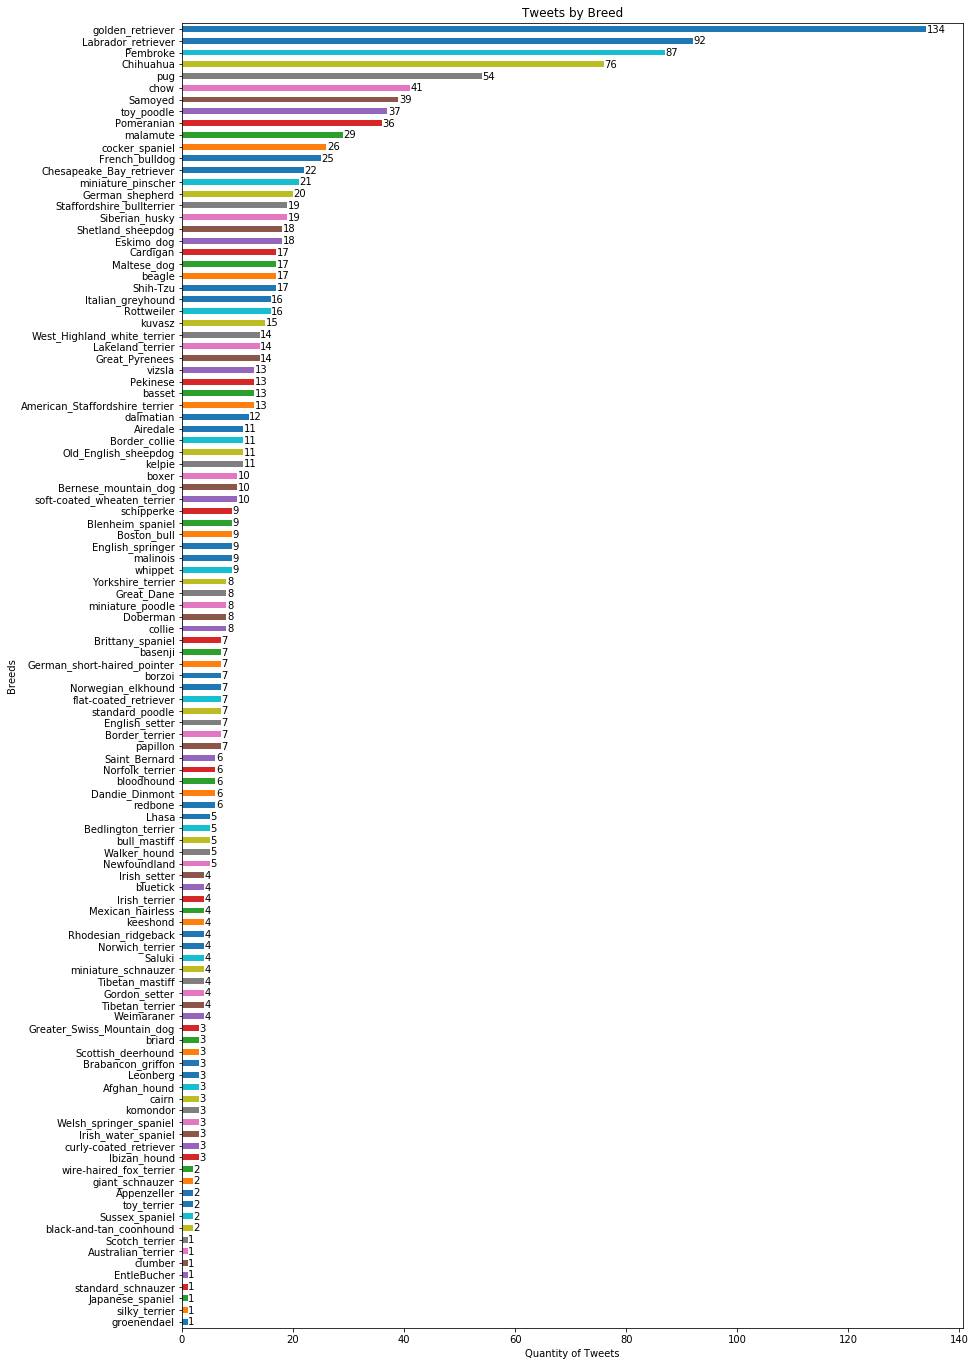

In [165]:
dog_breed_counts = df_master.breed.value_counts(ascending = True)
ax = dog_breed_counts.plot.barh(figsize = (14, 24));
for breed, count in enumerate(dog_breed_counts):
    ax.annotate(count,(count + 0.1, breed - 0.3))
ax.set_title('Tweets by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Quantity of Tweets');

Perhap unsurpisingly, the Golden Retriever is the most popular breed amongst WeRateDogs tweets. I would guess that this list reflects the popularity of dog breeds in general. 

While this is arguably uninteresting result, perhaps some breeds are favorited more, retweeted more, or even rated higher than others. 

Similary to the tweet quantities, I will chart the mean likes and retweets by breed. This time, I will only plot breeds with more than 5 tweets. 

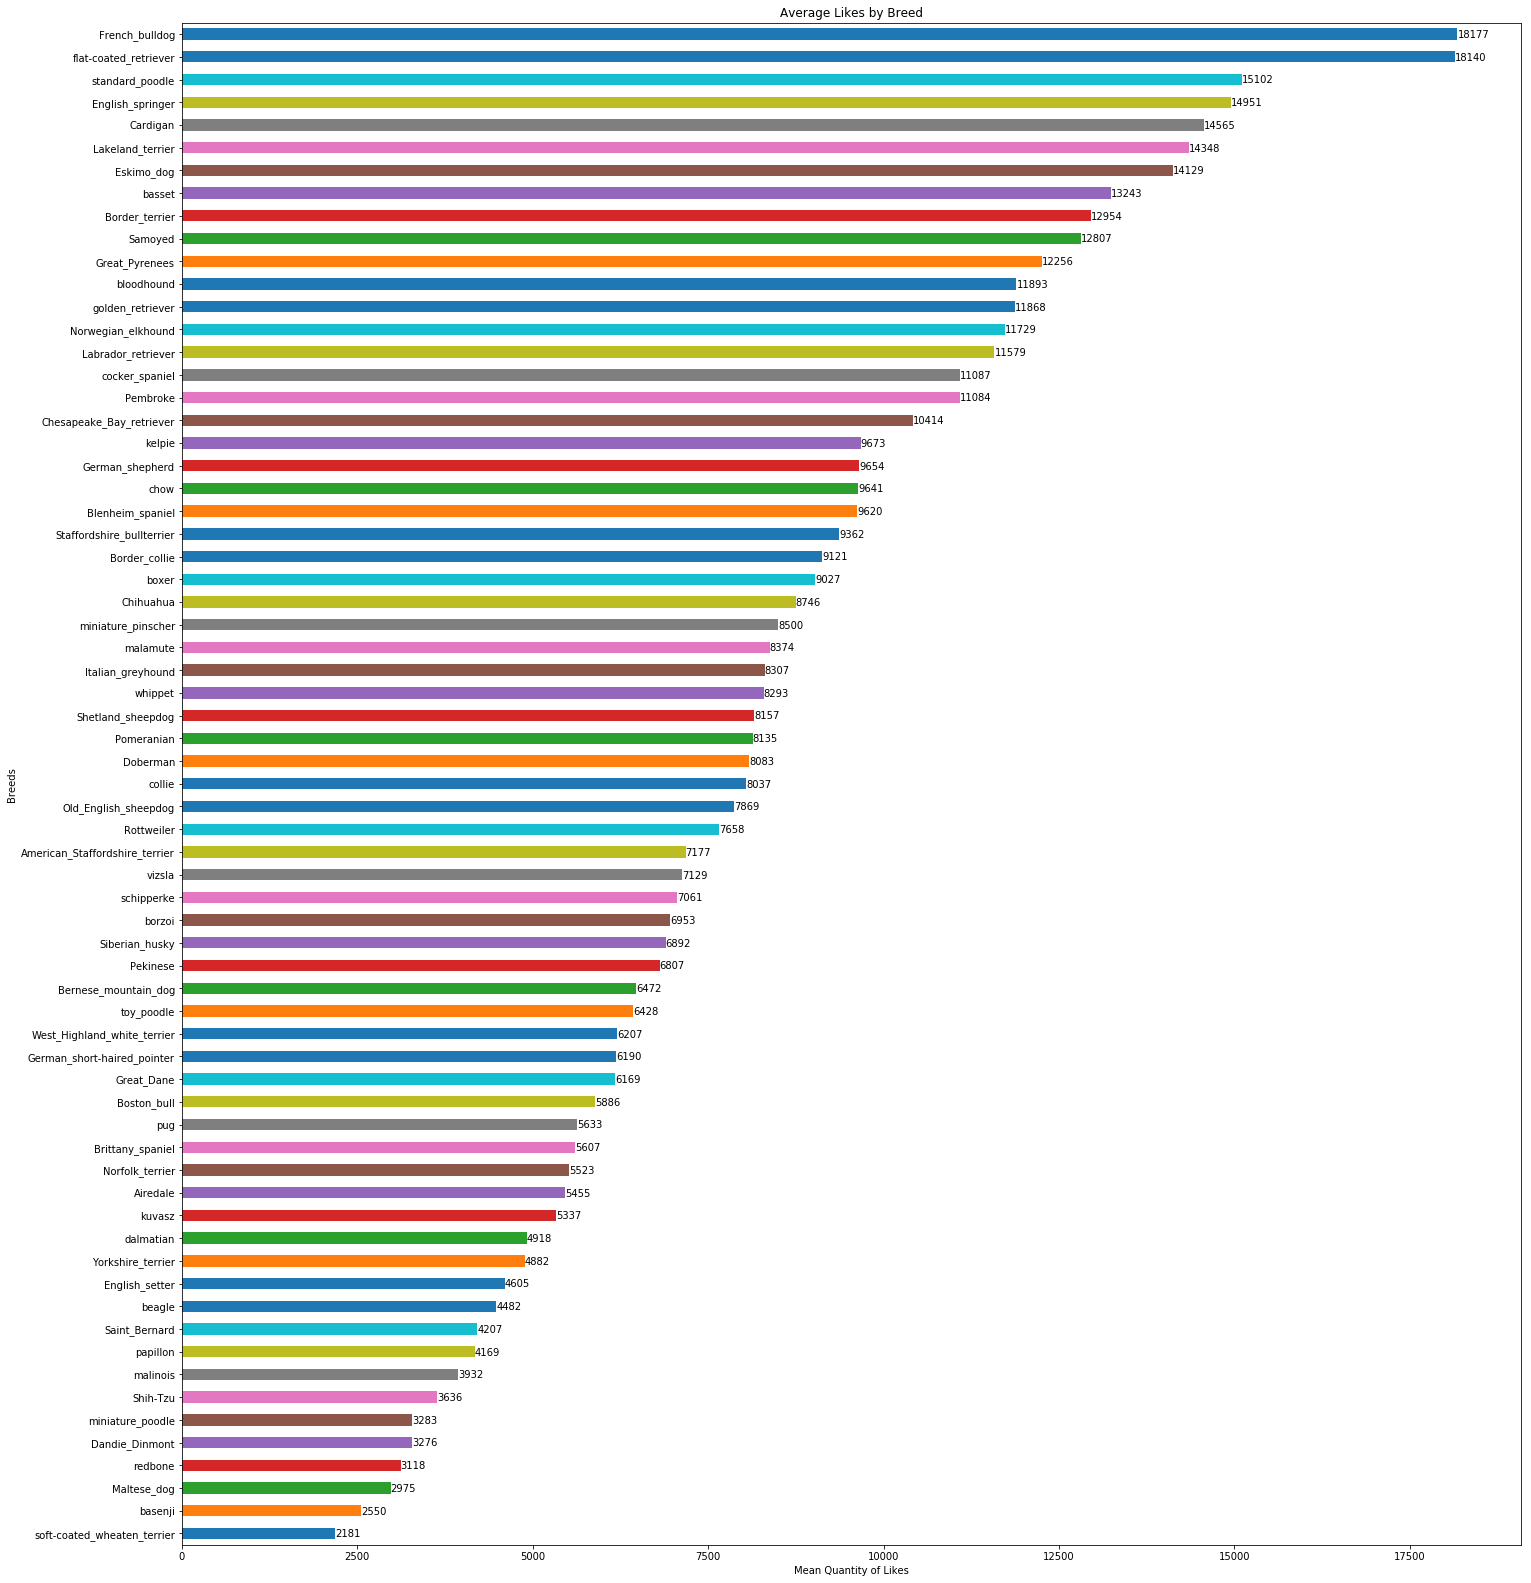

In [166]:
breed_counts = df_master.breed.value_counts()
breed_counts_morethan5 = breed_counts[breed_counts > 5]
breed_likes_threshold = df_master.groupby(['breed']).favorite_count.mean()[breed_counts_morethan5.index].sort_values()
ax = breed_likes_threshold.plot.barh(figsize = (24, 28));
for breed, count in enumerate(breed_likes_threshold):
    ax.annotate(round(count),(count + 0.01, breed - 0.15))
ax.set_title('Average Likes by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Mean Quantity of Likes');

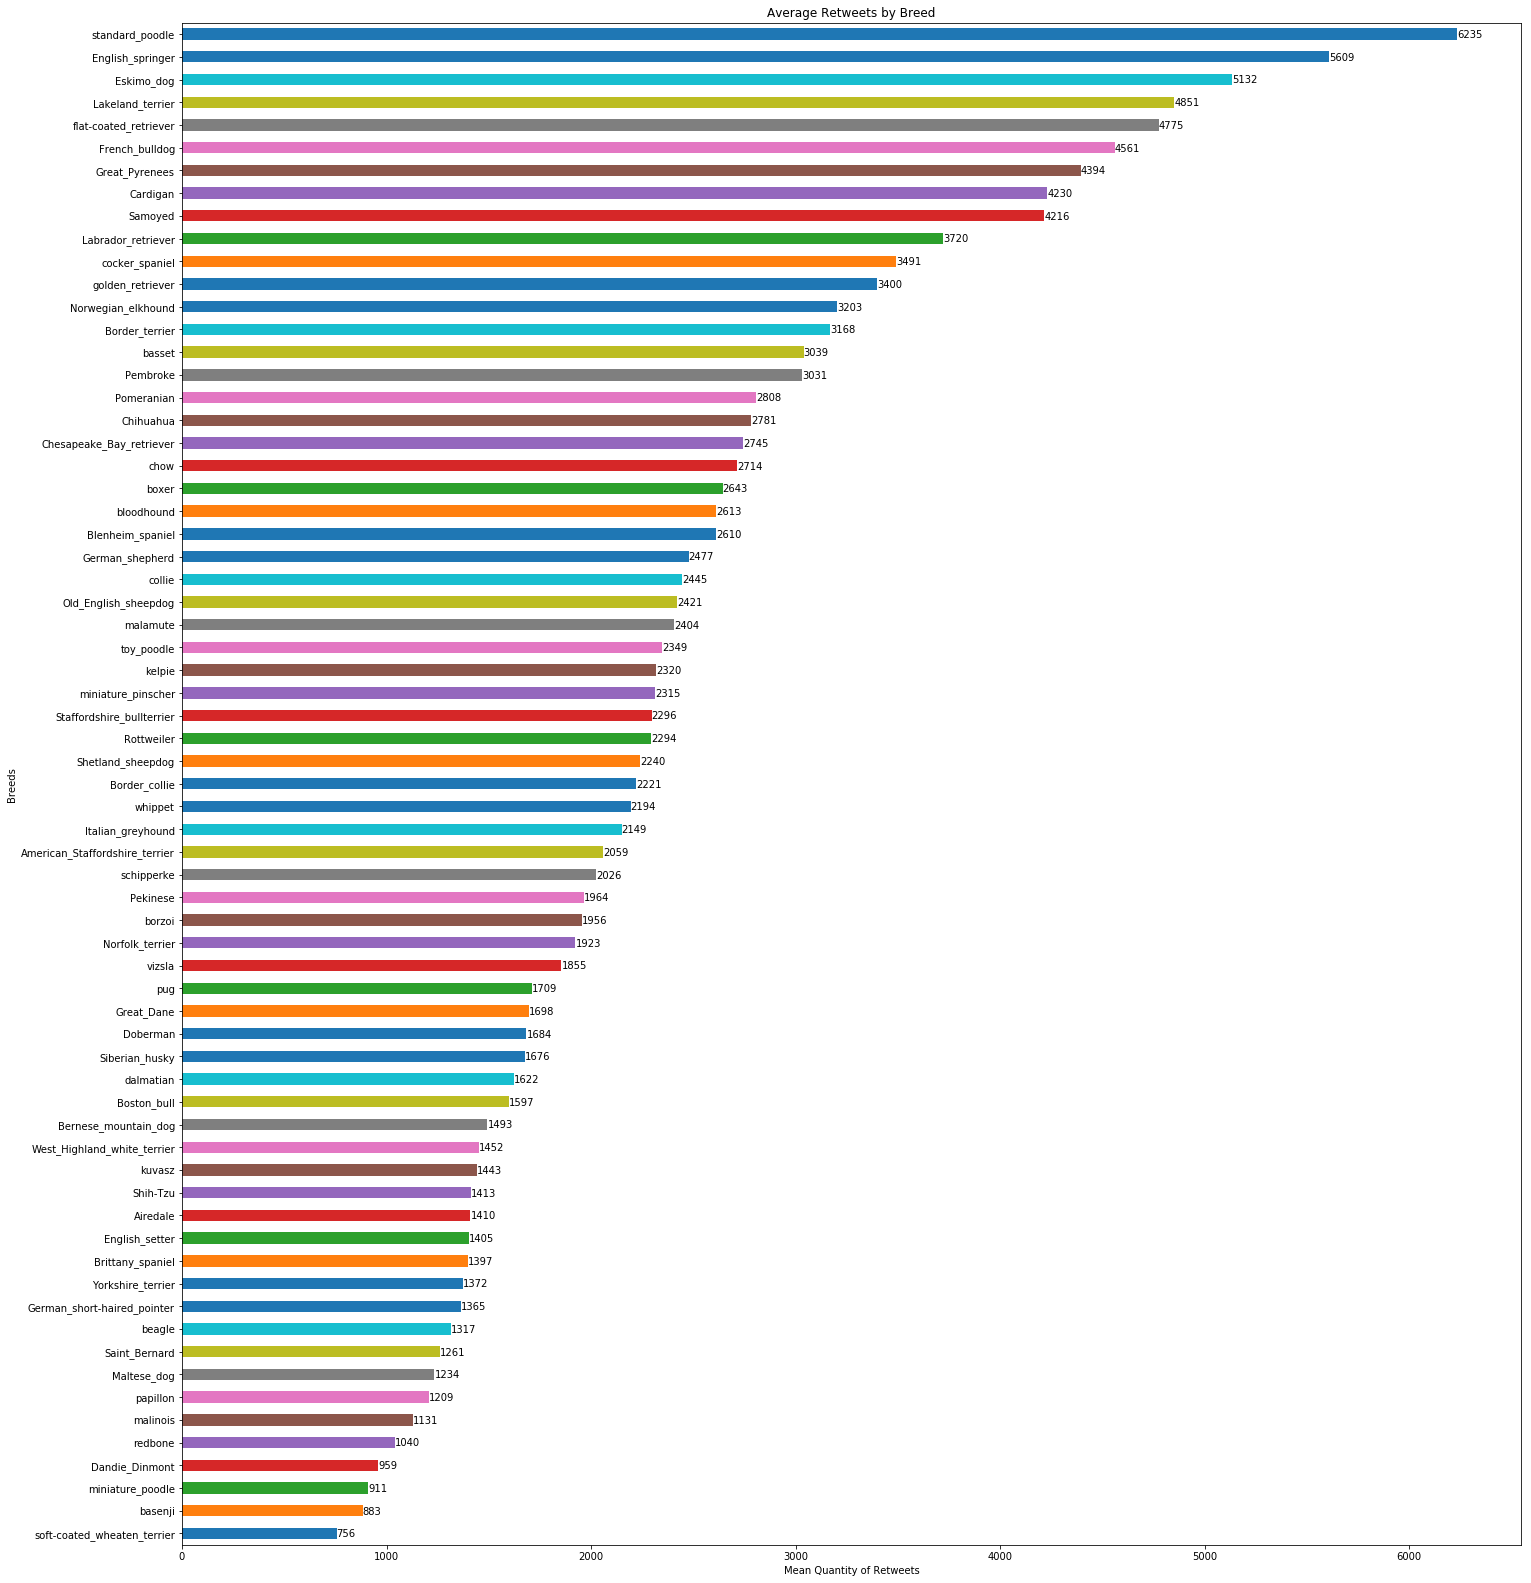

In [167]:
breed_retweet_threshold = df_master.groupby(['breed']).retweet_count.mean()[breed_counts_morethan5.index].sort_values()
ax = breed_retweet_threshold.plot.barh(figsize = (24, 28));
for breed, count in enumerate(breed_retweet_threshold):
    ax.annotate(round(count),(count + 0.01, breed - 0.15))
ax.set_title('Average Retweets by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Mean Quantity of Retweets');

Interestingly enough, by a significant margin, French Bulldogs get the most likes per tweet and Standard Poodles get the most retweets per tweet. Perhaps an insight here would be that to generate more likes and retweets, WeRateDogs would be better served tweeting according the highest retweets and likes per tweet, rather than just rating common breeds.

While the above insight has direct implications concerning the marketability of the WeRateDogs account, I do think it would just be fun to chart the ratings by breed since the data is available.

Given that that rating denominators are not always constant, I will create an additional *rating* column that holds the quotient of the rating values so that the ratings are comparable across all tweets. 

In [168]:
df_master.insert(loc = 6, column = "rating", value = df_master.rating_numerator/df_master.rating_denominator)
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating,rating_denominator,name,dog_stage,jpg_url,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,1.3,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6077,32400
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,1.2,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4021,24397
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,1.2,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9080,39231
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,1.3,10.0,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,3011,19721
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,1.3,10.0,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,1989,11533


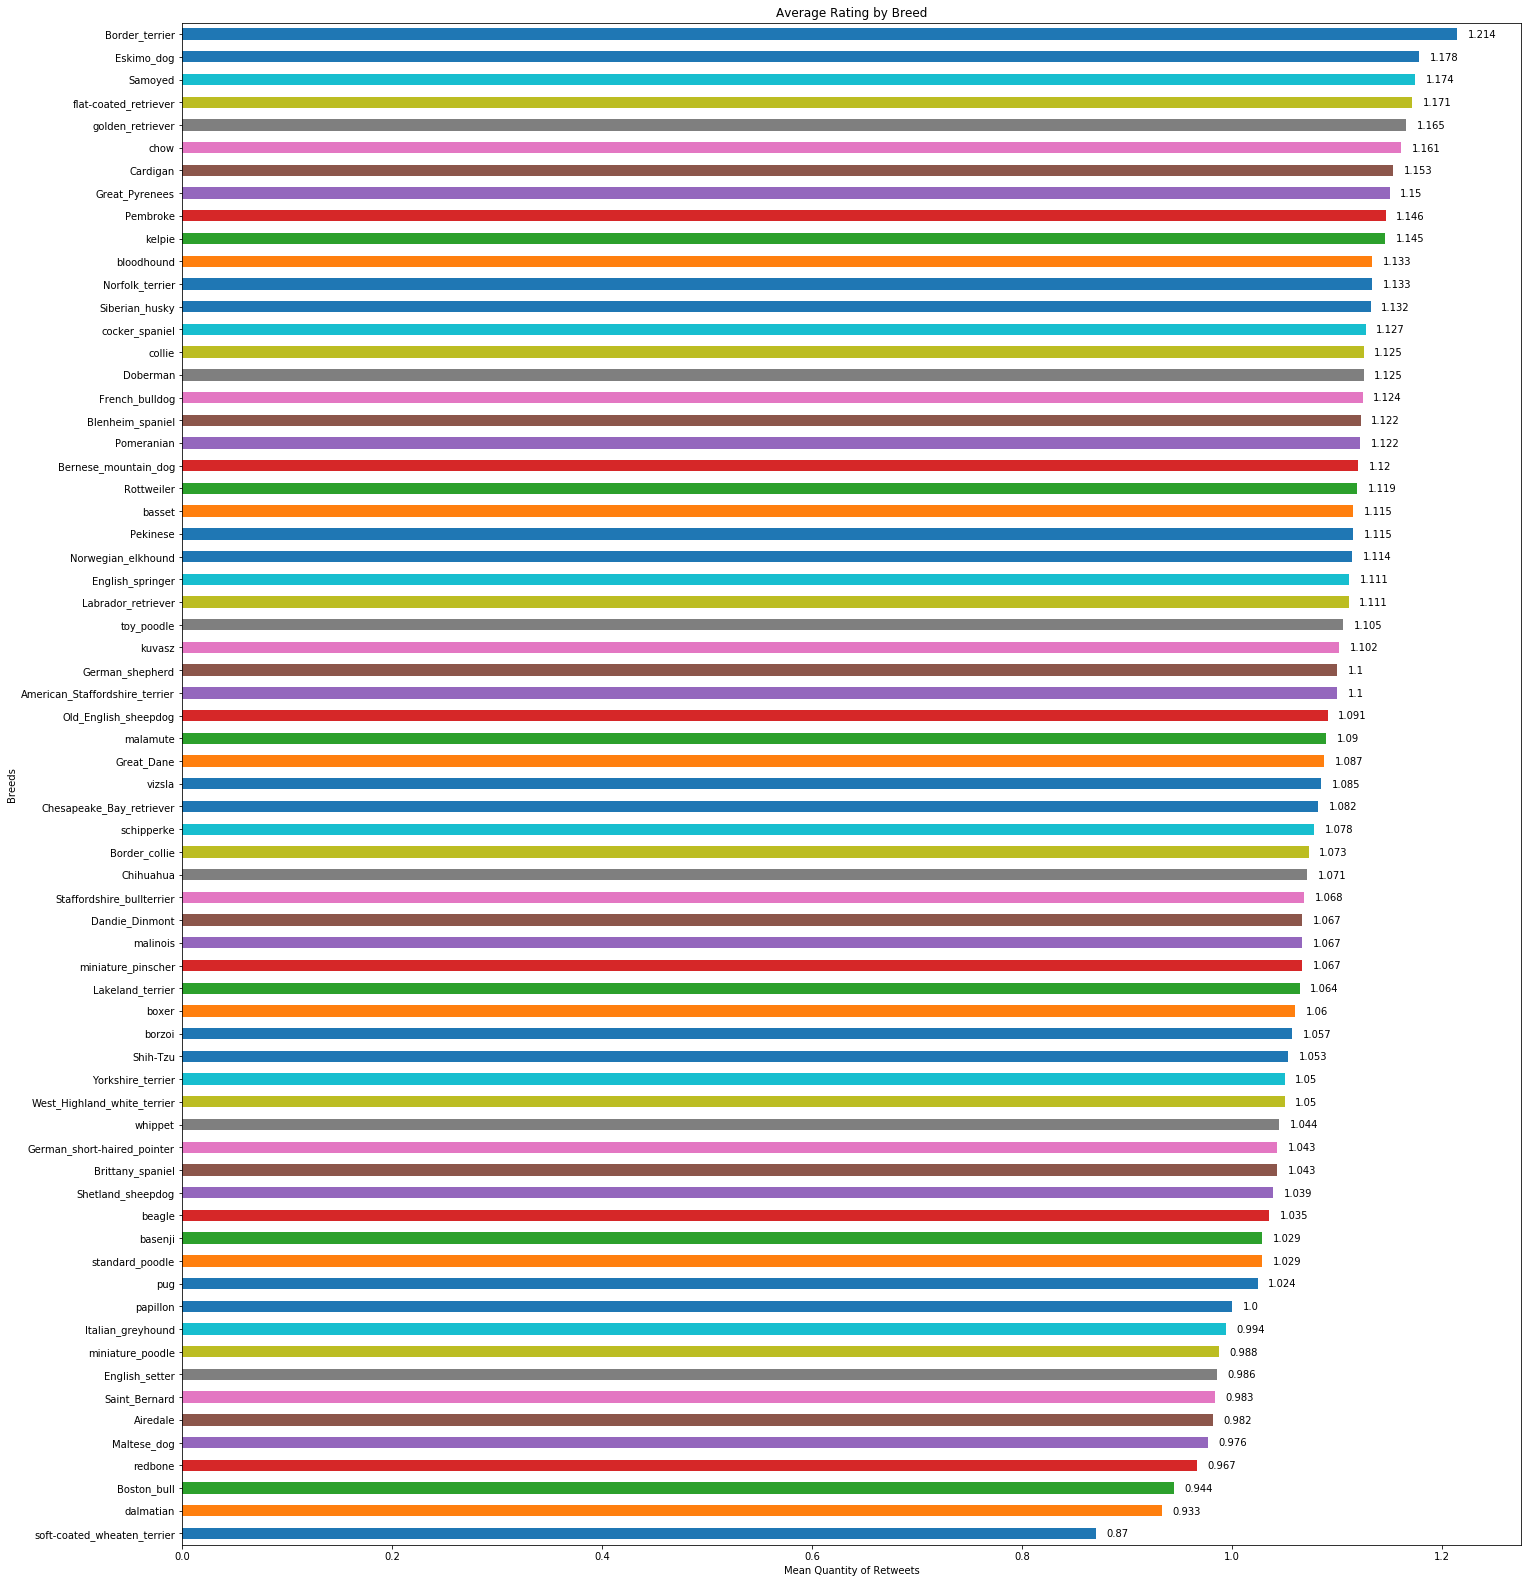

In [169]:
breed_rating_threshold = df_master.groupby(['breed']).rating.mean()[breed_counts_morethan5.index].sort_values()
ax = breed_rating_threshold.plot.barh(figsize = (24, 28));
for breed, count in enumerate(breed_rating_threshold):
    ax.annotate(round(count,3),(count + 0.01, breed - 0.15))
ax.set_title('Average Rating by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Mean Quantity of Retweets');

Surprisingly, the Border Terrier wins out here, even though the breed is not among the most commonly tweeted breeds. 

### Exploring Covariance

Since there are several continuous variables in the master dataframe, it would be useful to explore any correlations in the dataset. 

I will generate a heatmap of a covariance table to produce the correlation values and visualize the significance of the correlations. 

Before generating the covariance tables, I will re-produce dummy variables for the melted column, and include the dummy values in the covariance analysis. 

In [170]:
df_master = df_master.join(df_master.dog_stage.str.get_dummies(sep=', '))
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating,rating_denominator,name,dog_stage,jpg_url,breed,retweet_count,favorite_count,None,doggo,floofer,pupper,puppo
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,1.3,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6077,32400,1,0,0,0,0
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,1.2,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4021,24397,1,0,0,0,0
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,1.2,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9080,39231,1,0,0,0,0
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,1.3,10.0,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,3011,19721,1,0,0,0,0
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,1.3,10.0,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,1989,11533,1,0,0,0,0


I will now generate the heatmap.

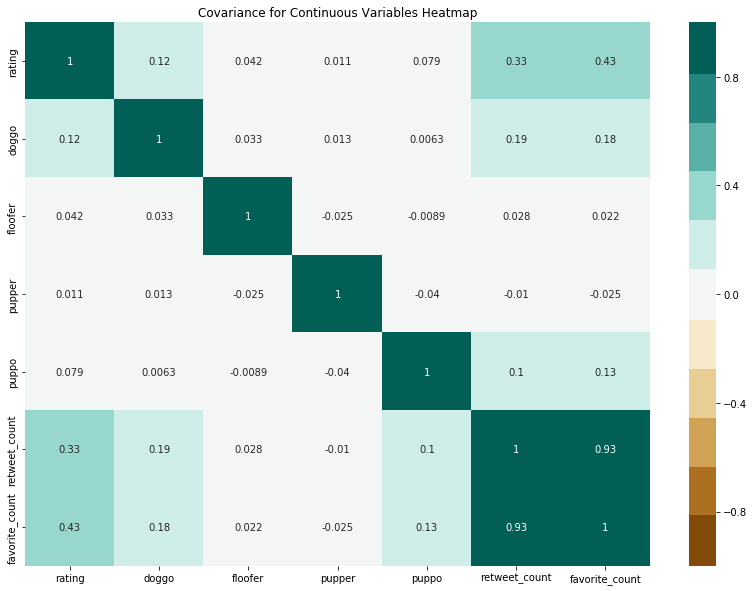

In [171]:
# heatmap for covariance among continuous variables
corr_table = df_master.loc[:,['rating', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count']].corr()
plt.pyplot.figure(figsize = (14,10))
plt.pyplot.title('Covariance for Continuous Variables Heatmap')
ax = sns.heatmap(corr_table, vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11));
plt.pyplot.yticks(va = 'center');

#ax.xaxis.set_tick_params(horizontalalignment='center')
#xtick_locations = np.arange(0,15,1);
#plt.pyplot.xticks(xtick_locations, [str(loc/10) for loc in xtick_locations]);

For the dog stages, it appears only **doggo** and **puppo** produced significant correlations, and the strongest correlation is between **doggo** and **retweet** with a correlation of 0.19, which might not be considered a strong correlation, but maybe it won't hurt to use "doggo" and "puppo" more often (or rate more pictures of "doggos" and "puppos"?; I'm not sure what these words mean). 

Interestingly, there do appear to be significant correlations between the *seemingly* arbitrary ratings and likes and retweets. 

I will plot these relations to see visually inspect these correlations. 

For 2D plots of ratings and likes/retweets, I will use a scatter plot with jitter. I will apply a jitter since ratings are almost practically discrete. The jitter will help with effectively visualizing the quantity of values at or near a particular coordinate. 

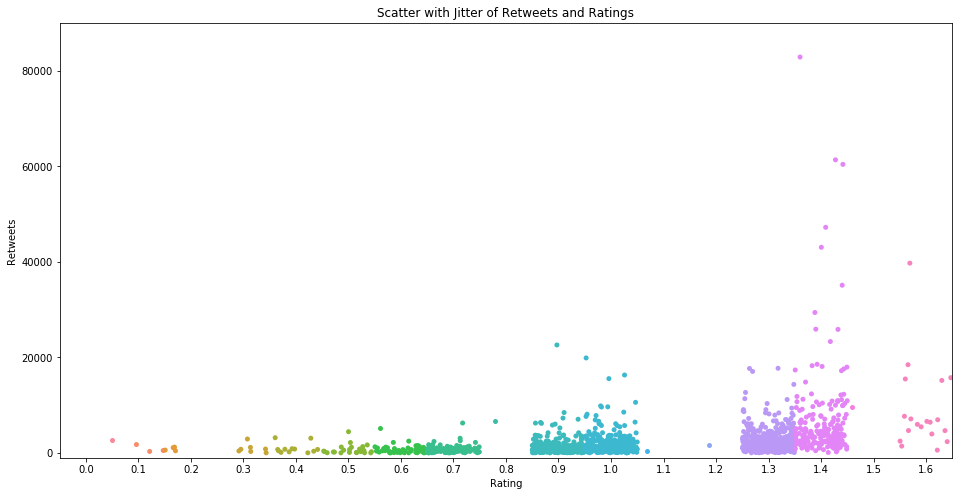

In [172]:
import numpy as np

plt.pyplot.figure(figsize = (16,8))
# adding jitter given ratings almost look discrete; using stipplot() for jitter
ax = sns.stripplot(x = df_master.rating, y = df_master.retweet_count, jitter = 0.5);
# manually specifying ticks at 0.1 increments rather than ticking at exact rating values
xtick_locations = np.arange(0,17,1);
plt.pyplot.xticks(xtick_locations, [str(loc/10) for loc in xtick_locations]);
# strange behavior with y-axis limits; manually specifying limits
plt.pyplot.ylim(-1000, 90000);

ax.set_title('Scatter with Jitter of Retweets and Ratings');
ax.set_ylabel('Retweets');
ax.set_xlabel('Rating');

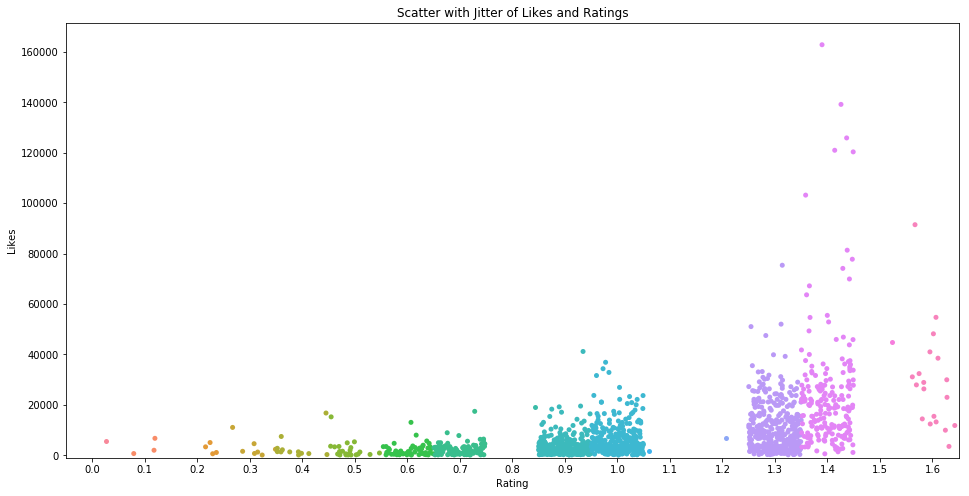

In [173]:
plt.pyplot.figure(figsize = (16,8))
# adding jitter given ratings almost look discrete; using stipplot() for jitter
ax = sns.stripplot(x = df_master.rating, y = df_master.favorite_count, jitter = 0.5);
# manually specifying ticks at 0.1 increments rather than ticking at exact rating values
xtick_locations = np.arange(0,17,1);
plt.pyplot.xticks(xtick_locations, [str(loc/10) for loc in xtick_locations]);
# strange behavior with y-axis limits; manually specifying
plt.pyplot.ylim(-1000);

ax.set_title('Scatter with Jitter of Likes and Ratings');
ax.set_ylabel('Likes');
ax.set_xlabel('Rating');

There does appear to be a positive relationship between the ratings and the popularity of the tweets. So maybe WeRateDogs shouldn't expect low rated dogs to garner much publicity. 

## Conclusions

After wrangling the data from the different data sources, I was able to use data from each data source to produce the following insights: 

1. Although Golden Retrievers are by far the most common breed on WeRateDogs, there are other breeds that garner more likes and retweets. 
2. Whether a tweet has a "floofer" and "pupper" doesn't seem impact likes and retweets, but there is a slight positive correlation for "doggos" and "puppos". 
3. Higher ratings do appear to garner more likes and retweets. 

So maybe for the next rating, WeRateDogs should seek a very good French Bulldog and award the "doggo" a 14/10. 